In [42]:
#import
from gwpy.timeseries import TimeSeries
from scipy.signal import get_window
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import gwsurrogate
import gwpy

In [4]:
gwsurrogate.catalog.pull('NRSur7dq4')


NRSur7dq4.h5 file exits, moving to /Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwsurrogate/surrogate_downloads/backup/2020Jun30_20h:52m:05s_NRSur7dq4.h5.


'/Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwsurrogate/surrogate_downloadsNRSur7dq4.h5'

In [5]:
# Load the surrogate, this only needs to be done once at the start of a script
sur = gwsurrogate.LoadSurrogate('NRSur7dq4')

/Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:245: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.t = h5file['t_ds'].value
/Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:272: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'coefs': group['%s_coefs'%(key)].value,
/Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:273: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'bfOrders': group['%s_bfOrders'%(key)].value
/Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:282: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'coefs': group['%s_%d_coefs'%(key, i)].value,
/Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwsurrogat

Loaded NRSur7dq4 model


Text(0.5, 0, 't [s]')

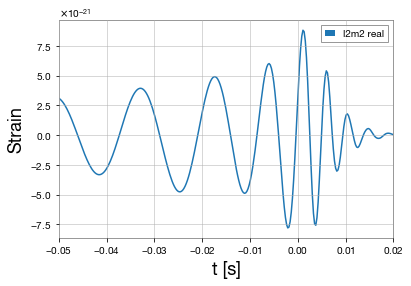

In [9]:
# Evaluate waveform modes in physical units
q = 4
chiA = [-0.2, 0.4, 0.1]
chiB = [-0.5, 0.2, -0.4]
f_ref = 20         # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 0          # initial frequency, f_low=0 returns the full surrogate
M = 70             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt =  1./4096       # step size in seconds
ellMax = 4         # Highest ell index for modes to use

# dyn stands for dynamics, do dyn.keys() to see contents
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, units='mks')

plt.plot(t, h[(2,2)].real, label='l2m2 real')
plt.legend()
plt.xlim([-0.05,0.02])
plt.ylabel('Strain', fontsize=18)
plt.xlabel('t [s]', fontsize=18)

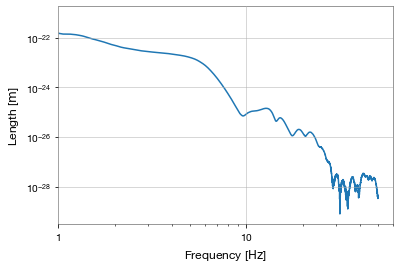

In [43]:
#for reference,
#use: https://github.com/gw-odw/odw-2020/blob/master/Day_1/Tuto%201.2%20Open%20Data%20access%20with%20GWpy.ipynb


#Time series 
strain = h[(2,2)].real
model_waveform_series = TimeSeries(strain, unit = 'm', sample_rate = 100, name = 'strain')
#print(model_waveform_series)

#Adding window and applying it 
#help(get_window)
window = get_window(('tukey', (0.1)), model_waveform_series.size)
series_with_window = model_waveform_series * window

#calculate/plotting the Fourier transform of our TimeSeries
fft_amplitude = series_with_window.fft().abs()
plot = fft_amplitude.plot(xscale="log", yscale="log")
plt.xlim([1,60])
plot.show(warn=False)
